In [3]:
import keras as K
import tensorflow as tf
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, Input
from keras.layers import BatchNormalization

from keras.models import Model


(480, 640, 3)


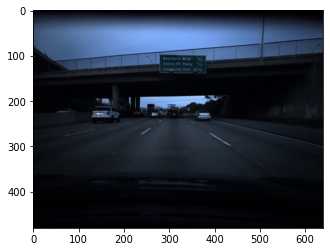

In [4]:

img = plt.imread('data/frames/frame00001.jpg')   # reading image using its name
plt.imshow(img)
print (img.shape)


In [5]:
#collect filenames if frames are already generated

import os

filenames = []
for root, dirs, files in os.walk('data/frames'):
    for file in files:
        if file.endswith('.jpg'):
            filenames.append(file)
            
#filenames=np.asarray(sorted(filenames))

In [6]:
Y_train = np.loadtxt("data/train.txt")
#Y_train = np.asarray(Y_train).astype(np.float32)


filenames_w_ylabels = [sorted(filenames), Y_train]
df_filenames_ylabels = pd.DataFrame(filenames_w_ylabels).transpose()

df_filenames_ylabels = df_filenames_ylabels.rename({0:'filename', 1:'class'}, axis='columns')

print(df_filenames_ylabels)

             filename    class
0      frame00000.jpg  28.1056
1      frame00001.jpg  28.1056
2      frame00002.jpg  28.1065
3      frame00003.jpg  28.1304
4      frame00004.jpg  28.1092
...               ...      ...
20395  frame20395.jpg  2.32918
20396  frame20396.jpg  2.28979
20397  frame20397.jpg  2.29292
20398  frame20398.jpg   2.2606
20399  frame20399.jpg  2.20676

[20400 rows x 2 columns]


In [7]:
files_labels=tuple(zip(sorted(filenames), Y_train))
#filenames[:-1]=Y_train
#print(Y_train.shape)
#print (np.transpose(filenames).shape)
#print(files_labels)

In [134]:
#unused - error with ImageDataGenerator methods accepting numpy arrays (also tried flow_from_dataframe without success)
#train_datagen=ImageDataGenerator()
#XY_dataset=train_datagen.flow_from_dataframe(df_filenames_ylabels, directory='data/frames', target_size=(480,640), class_mode='raw', shuffle=False)


Found 20400 validated image filenames.


In [8]:
input_tensor=Input(shape=(480,640,3))
hidden=BatchNormalization()(input_tensor)
hidden=Conv2D(64, 3, padding='same', input_shape=(480, 640, 3))(hidden)
hidden=MaxPooling2D(strides=2)(hidden)
hidden=Conv2D(128, 3, padding='same', input_shape=(240, 320, 64))(hidden)
hidden=MaxPooling2D(strides=2)(hidden)
hidden=Conv2D(128, 3, padding='same', input_shape=(240, 320, 128))(hidden)
hidden=MaxPooling2D(4,strides=4)(hidden)
hidden=Flatten()(hidden)
hidden=Dense(10, activation='relu')(hidden)
hidden=Dropout(0.8)(hidden)
outputs=Dense(1, activation='linear')(hidden)

model=Model(inputs=input_tensor, outputs=outputs)

In [9]:
model.summary()
model.compile(optimizer='Adam', loss='mean_squared_error')


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480, 640, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 480, 640, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 480, 640, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 320, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 320, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 160, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 160, 128)     147584

In [1]:
def get_batch_data(start, num_imgs, files_labels):
    begin=start
    end=start+num_imgs
    data_batch=files_labels[begin+1:end]
    im=image.load_img('data/frames/'+files_labels[begin][0])
    x=np.expand_dims(image.img_to_array(im), axis=0)
    y=[]
    y.append(files_labels[begin][1])

    for file, label in enumerate(tqdm(data_batch)):
        im = image.load_img('data/frames/'+file)
        im = np.expand_dims(image.img_to_array(im), axis=0)
        x = np.concatenate((x, im), axis=0)
        y.append(label)

    return x, np.asarray(y)

In [ ]:
X_batch, Y_batch=get_batch_data(i, 500, files_labels)
print (X_batch.shape)
print (Y_batch.shape)
    
history=model.fit(x=X_batch, y=Y_batch, batch_size=32, epochs=5)

(500, 480, 640, 3)
(500,)
Epoch 1/5


In [241]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.show()

NameError: name 'history' is not defined